In [1]:
# !sudo apt-get install -y fonts-nanum* | tail -n 1
# !sudo fc-cache -fv
# !rm -rf ~/.cache/matplotlib

In [43]:
!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1

In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from torchinfo import summary
from torchviz import make_dot

plt.rc('font', family='NanumBarunGothic')

In [3]:
# %matplotlib inline
# import numpy as np
# import matplotlib.pyplot as plt
# from IPython.display import display

# # 폰트 관련 용도
# import matplotlib.font_manager as fm

# # 나눔 고딕 폰트의 경로 명시
# path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# font_name = fm.FontProperties(fname=path, size=10).get_name()

#### 8.4 활성화 함수와 ReLU 함수

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


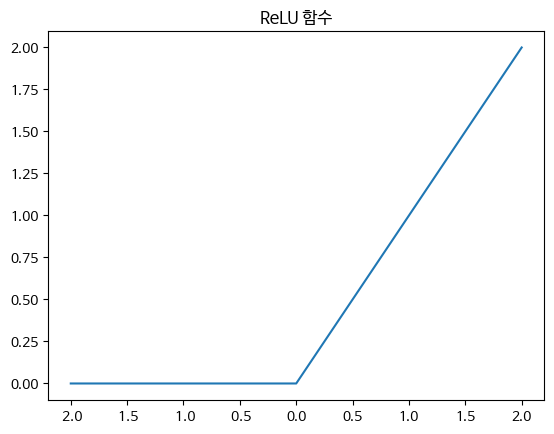

In [4]:
relu = nn.ReLU()
x_np = np.arange(-2,2.1,0.25)
x = torch.tensor(x_np, dtype=torch.float32)
y = relu(x)

plt.plot(x.data, y.data)
plt.title('ReLU 함수')
plt.show()

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [6]:
x_np = np.arange(-2,2.1,0.25)
y_np = np.arange(-1,3.1,0.25)
x = torch.tensor(x_np, dtype=torch.float32)
y = torch.tensor(y_np, dtype=torch.float32)

z = x*y
print(z)

tensor([ 2.0000,  1.3125,  0.7500,  0.3125, -0.0000, -0.1875, -0.2500, -0.1875,
         0.0000,  0.3125,  0.7500,  1.3125,  2.0000,  2.8125,  3.7500,  4.8125,
         6.0000])


In [7]:
x = x.to(device)
print(x.device)
print(y.device)

cuda:0
cpu


In [8]:
z = x*y

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [9]:
y = y.to(device)
z = x*y
print(z)

tensor([ 2.0000,  1.3125,  0.7500,  0.3125, -0.0000, -0.1875, -0.2500, -0.1875,
         0.0000,  0.3125,  0.7500,  1.3125,  2.0000,  2.8125,  3.7500,  4.8125,
         6.0000], device='cuda:0')


#### 8.8 데이터 준비 1

In [10]:
import torchvision.datasets as datasets
data_root = './data'

train_set0 = datasets.MNIST(root=data_root, train=True, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 151397462.04it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 40084610.80it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 35657011.88it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 5258219.37it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [11]:
!ls -lR ./data/MNIST

./data/MNIST:
total 4
drwxr-xr-x 2 root root 4096 Mar 21 22:33 raw

./data/MNIST/raw:
total 65008
-rw-r--r-- 1 root root  7840016 Mar 21 22:33 t10k-images-idx3-ubyte
-rw-r--r-- 1 root root  1648877 Mar 21 22:33 t10k-images-idx3-ubyte.gz
-rw-r--r-- 1 root root    10008 Mar 21 22:33 t10k-labels-idx1-ubyte
-rw-r--r-- 1 root root     4542 Mar 21 22:33 t10k-labels-idx1-ubyte.gz
-rw-r--r-- 1 root root 47040016 Mar 21 22:33 train-images-idx3-ubyte
-rw-r--r-- 1 root root  9912422 Mar 21 22:33 train-images-idx3-ubyte.gz
-rw-r--r-- 1 root root    60008 Mar 21 22:33 train-labels-idx1-ubyte
-rw-r--r-- 1 root root    28881 Mar 21 22:33 train-labels-idx1-ubyte.gz


In [12]:
print(len(train_set0))
image, label = train_set0[0]

print(type(image))
print(type(label))

60000
<class 'PIL.Image.Image'>
<class 'int'>


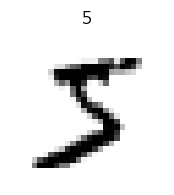

In [13]:
plt.figure(figsize=(2,2))
plt.title(f'{label}')
plt.imshow(image, cmap='gray_r')
plt.axis('off')
plt.show()

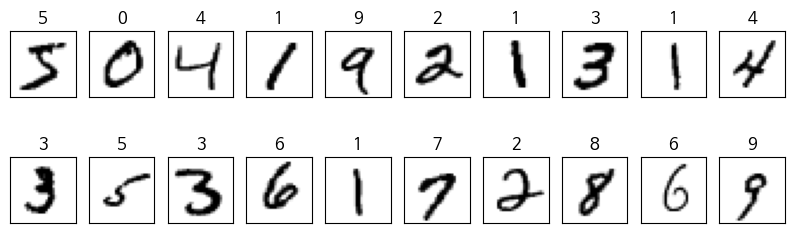

In [14]:
plt.figure(figsize=(10,3))
for i in range(20):
    ax = plt.subplot(2,10,i+1)

    image, label = train_set0[i]

    plt.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### 8.9 데이터 준비 2


##### Step1. ToTensor 사용하기

In [15]:
import torchvision.transforms as transforms

transform1 = transforms.Compose([transforms.ToTensor(), ])

train_set1 = datasets.MNIST(root=data_root, train=True, download=True, transform = transform1)

In [16]:
image, label = train_set1[0]
print(type(image))
print(type(label))
# print(image.data)
print(image.data.shape)
print(image.data.max())
print(image.data.min())

<class 'torch.Tensor'>
<class 'int'>
torch.Size([1, 28, 28])
tensor(1.)
tensor(0.)


##### Step2. Normalize 사용하기

In [17]:
transform2 = transforms.Compose([transforms.ToTensor(), transforms.Normalize(0.5,0.5),])
train_set2 = datasets.MNIST(root=data_root, train=True, download=True, transform=transform2)


In [18]:
image, label = train_set2[0]
print(type(image))
print(type(label))
# print(image.data)
print(image.data.shape)
print(image.data.max())
print(image.data.min())

<class 'torch.Tensor'>
<class 'int'>
torch.Size([1, 28, 28])
tensor(1.)
tensor(-1.)


##### Step3. Lambda 클래스를 사용해 1차원으로 텐서 변환하기

In [19]:
transform3 = transforms.Compose([transforms.ToTensor(), transforms.Normalize(0.5,0.5), transforms.Lambda(lambda x:x.view(-1)),])
train_set3 = datasets.MNIST(root=data_root, train=True, download=True, transform=transform3)

In [20]:
image, label = train_set3[0]
print(type(image))
print(type(label))
# print(image.data)
print(image.data.shape)
print(image.data.max())
print(image.data.min())

<class 'torch.Tensor'>
<class 'int'>
torch.Size([784])
tensor(1.)
tensor(-1.)


In [21]:
#Transforms의 최종 정의
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(0.5,0.5), transforms.Lambda(lambda x:x.view(-1)),])
train_set = datasets.MNIST(root=data_root, train=True, download=True, transform=transform)
test_set = datasets.MNIST(root=data_root, train=False, download=True, transform=transform)

In [ ]:
https://github.com/wikibook/pytorchdl2/blob/main/notebooks/ch08_dl.ipynb

#### 8.10 데이터 준비 3

In [22]:
from torch.utils.data import DataLoader

batch_size = 500

train_loader = DataLoader(train_set, batch_size = batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size = batch_size, shuffle=False)

In [23]:
print(len(train_loader))

for images, labels in train_loader:
    break

# print(type(train_loader))

print(images.shape)
print(labels.shape)

120
torch.Size([500, 784])
torch.Size([500])


In [24]:
print(type(train_loader))

<class 'torch.utils.data.dataloader.DataLoader'>


In [30]:
# list(train_loader)[0]
train_loader.data.numpy().shape

AttributeError: 'DataLoader' object has no attribute 'data'

#### 8.11 모델 정의

In [32]:
n_input = image.shape[0]
n_hidden = 128
n_output = len(set(list(labels.data.numpy())))

print(f"n_input:{n_input}, n_hidden={n_hidden}, n_output={n_output}")

n_input:784, n_hidden=128, n_output=10


In [38]:
class Net(nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super().__init__()

        self.l1 = nn.Linear(n_input, n_hidden)
        self.l2 = nn.Linear(n_hidden, n_output)
        self.relu = nn.ReLU(inplace = True)

    def forward(self,x):
        x1 = self.l1(x)
        x2 = self.relu(x1)
        x3 = self.l2(x2)
        return x3

In [39]:
torch.manual_seed(123)
torch.cuda.manual_seed(123)

# net = Net(n_input, n_output, n_hidden)
# net = net.to(device)
net = Net(n_input, n_output, n_hidden).to(device)

In [40]:
for parameter in net.named_parameters():
    print(parameter)

('l1.weight', Parameter containing:
tensor([[-0.0146,  0.0012, -0.0177,  ...,  0.0277,  0.0200,  0.0315],
        [ 0.0184, -0.0322,  0.0175,  ...,  0.0089, -0.0028, -0.0033],
        [ 0.0092,  0.0261,  0.0075,  ...,  0.0061,  0.0267, -0.0258],
        ...,
        [ 0.0235, -0.0026, -0.0129,  ...,  0.0322, -0.0059, -0.0169],
        [-0.0328, -0.0258,  0.0124,  ..., -0.0049,  0.0006,  0.0334],
        [ 0.0187, -0.0076, -0.0202,  ...,  0.0325, -0.0159, -0.0240]],
       device='cuda:0', requires_grad=True))
('l1.bias', Parameter containing:
tensor([ 0.0325, -0.0298,  0.0013,  0.0199,  0.0268, -0.0248, -0.0172, -0.0355,
         0.0122, -0.0048,  0.0214,  0.0202, -0.0243,  0.0015, -0.0276,  0.0296,
         0.0341, -0.0228,  0.0230,  0.0347, -0.0091, -0.0346,  0.0206, -0.0060,
         0.0329,  0.0047,  0.0180,  0.0101,  0.0177, -0.0309,  0.0228, -0.0224,
         0.0321,  0.0179,  0.0321,  0.0184,  0.0219, -0.0089,  0.0310, -0.0039,
        -0.0074, -0.0317,  0.0192, -0.0021,  0.0190

In [41]:
print(net)

Net(
  (l1): Linear(in_features=784, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU(inplace=True)
)


In [ ]:
summary(net, (784,))

#### 8.12 경사 하강법

In [55]:
lr = 1e-6
optimizer = torch.optim.SGD(net.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

history = np.zeros((0,5))

In [56]:
# 예측 계산
for images, labels in train_loader:
    break

inputs = images.to(device)
labels = images.to(device)

outputs = net(inputs)

print(outputs)

tensor([[-0.2311, -0.1305, -0.0409,  ...,  0.0374,  0.0397,  0.1513],
        [-0.0500, -0.2367,  0.2070,  ..., -0.0543,  0.0060, -0.0103],
        [-0.2074, -0.2637, -0.1117,  ...,  0.0166, -0.2955, -0.0487],
        ...,
        [-0.1483, -0.0580,  0.0183,  ...,  0.2164,  0.1037, -0.1026],
        [-0.2392, -0.1720,  0.1737,  ...,  0.1228,  0.2141,  0.0972],
        [-0.3343, -0.2099, -0.1306,  ..., -0.0491,  0.0389, -0.0203]],
       device='cuda:0', grad_fn=<AddmmBackward0>)


In [57]:
outputs.shape, labels.shape

(torch.Size([500, 10]), torch.Size([500, 784]))

2.307387113571167


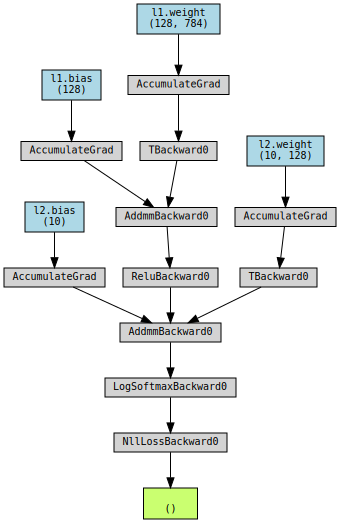

In [63]:
# 손실 계산
loss = criterion(outputs, labels)
print(loss.item())
g = make_dot(loss, params = dict(net.named_parameters()))
display(g)

In [59]:
from tqdm.notebook import tqdm

for epoch in range(num_epochs:=100):
    train_acc, train_loss = 0, 0
    val_acc, val_loss = 0, 0
    n_train, n_test = 0, 0

    # 훈련 Phase
    for inputs, labels in tqdm(train_loader):
        n_train += len(labels)

        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        predicted = torch.max(outputs, 1)[1]

        # 손실과 정확도 계산
        train_loss += loss.item()
        train_acc += (predicted == labels).sum().item()

    # 예측 Phase
    for inputs_test, labels_test in test_loader:
        n_test += len(labels_test)

        inputs_test = inputs_test.to(device)
        labels_test = labels_test.to(device)

        outputs_test = net(inputs_test)

        loss_test = criterion(outputs_test, labels_test)

        predicted_test = torch.max(outputs_test, 1)[1]

        val_loss += loss_test.item()
        val_acc += (predicted_test == labels_test).sum().item()

    # 평가 결과 산출, 기록
    train_acc = train_acc / n_train
    val_acc = val_acc / n_test
    train_loss = train_loss * batch_size / n_train
    val_loss = val_loss * batch_size / n_test
    print (f'Epoch [{epoch+1}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
    item = np.array([epoch+1 , train_loss, train_acc, val_loss, val_acc])
    history = np.vstack((history, item))

  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [1/100], loss: 0.00000 acc: 0.00000 val_loss: 2.32271, val_acc: 0.10090


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [2/100], loss: 0.00000 acc: 0.00000 val_loss: 2.32259, val_acc: 0.10100


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [3/100], loss: 0.00000 acc: 0.00000 val_loss: 2.32247, val_acc: 0.10110


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [4/100], loss: 0.00000 acc: 0.00000 val_loss: 2.32235, val_acc: 0.10120


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [5/100], loss: 0.00000 acc: 0.00000 val_loss: 2.32223, val_acc: 0.10130


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [6/100], loss: 0.00000 acc: 0.00000 val_loss: 2.32211, val_acc: 0.10120


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [7/100], loss: 0.00000 acc: 0.00000 val_loss: 2.32199, val_acc: 0.10110


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [8/100], loss: 0.00000 acc: 0.00000 val_loss: 2.32187, val_acc: 0.10130


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [9/100], loss: 0.00000 acc: 0.00000 val_loss: 2.32175, val_acc: 0.10140


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [10/100], loss: 0.00000 acc: 0.00000 val_loss: 2.32163, val_acc: 0.10140


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [11/100], loss: 0.00000 acc: 0.00000 val_loss: 2.32151, val_acc: 0.10140


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [12/100], loss: 0.00000 acc: 0.00000 val_loss: 2.32139, val_acc: 0.10150


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [13/100], loss: 0.00000 acc: 0.00000 val_loss: 2.32127, val_acc: 0.10160


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [14/100], loss: 0.00000 acc: 0.00000 val_loss: 2.32115, val_acc: 0.10170


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [15/100], loss: 0.00000 acc: 0.00000 val_loss: 2.32103, val_acc: 0.10190


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [16/100], loss: 0.00000 acc: 0.00000 val_loss: 2.32091, val_acc: 0.10200


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [17/100], loss: 0.00000 acc: 0.00000 val_loss: 2.32079, val_acc: 0.10190


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [18/100], loss: 0.00000 acc: 0.00000 val_loss: 2.32067, val_acc: 0.10190


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [19/100], loss: 0.00000 acc: 0.00000 val_loss: 2.32055, val_acc: 0.10180


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [20/100], loss: 0.00000 acc: 0.00000 val_loss: 2.32043, val_acc: 0.10200


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [21/100], loss: 0.00000 acc: 0.00000 val_loss: 2.32031, val_acc: 0.10220


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [22/100], loss: 0.00000 acc: 0.00000 val_loss: 2.32019, val_acc: 0.10240


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [23/100], loss: 0.00000 acc: 0.00000 val_loss: 2.32007, val_acc: 0.10270


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [24/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31995, val_acc: 0.10280


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [25/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31983, val_acc: 0.10280


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [26/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31971, val_acc: 0.10290


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [27/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31959, val_acc: 0.10290


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [28/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31947, val_acc: 0.10300


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [29/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31935, val_acc: 0.10310


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [30/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31923, val_acc: 0.10310


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [31/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31911, val_acc: 0.10300


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [32/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31899, val_acc: 0.10310


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [33/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31887, val_acc: 0.10330


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [34/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31875, val_acc: 0.10340


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [35/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31863, val_acc: 0.10330


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [36/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31851, val_acc: 0.10350


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [37/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31839, val_acc: 0.10350


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [38/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31827, val_acc: 0.10350


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [39/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31815, val_acc: 0.10340


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [40/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31803, val_acc: 0.10350


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [41/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31791, val_acc: 0.10370


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [42/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31779, val_acc: 0.10370


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [43/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31767, val_acc: 0.10400


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [44/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31755, val_acc: 0.10400


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [45/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31743, val_acc: 0.10400


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [46/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31731, val_acc: 0.10430


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [47/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31719, val_acc: 0.10460


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [48/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31707, val_acc: 0.10450


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [49/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31695, val_acc: 0.10450


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [50/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31684, val_acc: 0.10460


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [51/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31672, val_acc: 0.10460


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [52/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31660, val_acc: 0.10470


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [53/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31648, val_acc: 0.10500


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [54/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31636, val_acc: 0.10490


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [55/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31624, val_acc: 0.10510


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [56/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31612, val_acc: 0.10500


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [57/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31600, val_acc: 0.10490


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [58/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31588, val_acc: 0.10500


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [59/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31576, val_acc: 0.10500


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [60/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31564, val_acc: 0.10510


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [61/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31552, val_acc: 0.10540


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [62/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31541, val_acc: 0.10560


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [63/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31529, val_acc: 0.10560


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [64/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31517, val_acc: 0.10560


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [65/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31505, val_acc: 0.10590


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [66/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31493, val_acc: 0.10600


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [67/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31481, val_acc: 0.10620


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [68/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31469, val_acc: 0.10620


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [69/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31457, val_acc: 0.10630


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [70/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31446, val_acc: 0.10630


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [71/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31434, val_acc: 0.10630


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [72/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31422, val_acc: 0.10610


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [73/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31410, val_acc: 0.10610


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [74/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31398, val_acc: 0.10630


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [75/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31386, val_acc: 0.10630


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [76/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31374, val_acc: 0.10620


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [77/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31363, val_acc: 0.10610


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [78/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31351, val_acc: 0.10600


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [79/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31339, val_acc: 0.10600


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [80/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31327, val_acc: 0.10610


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [81/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31315, val_acc: 0.10620


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [82/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31303, val_acc: 0.10640


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [83/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31292, val_acc: 0.10640


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [84/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31280, val_acc: 0.10640


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [85/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31268, val_acc: 0.10640


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [86/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31256, val_acc: 0.10650


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [87/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31244, val_acc: 0.10650


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [88/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31232, val_acc: 0.10640


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [89/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31221, val_acc: 0.10650


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [90/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31209, val_acc: 0.10670


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [91/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31197, val_acc: 0.10680


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [92/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31185, val_acc: 0.10690


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [93/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31173, val_acc: 0.10690


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [94/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31162, val_acc: 0.10700


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [95/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31150, val_acc: 0.10710


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [96/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31138, val_acc: 0.10750


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [97/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31126, val_acc: 0.10740


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [98/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31115, val_acc: 0.10740


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [99/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31103, val_acc: 0.10750


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [100/100], loss: 0.00000 acc: 0.00000 val_loss: 2.31091, val_acc: 0.10760


#### 8.13 결과 확인

In [60]:
print(f'초기상태 : 손실 : {history[0,3]:.5f}  정확도 : {history[0,4]:.5f}' )
print(f'최종상태 : 손실 : {history[-1,3]:.5f}  정확도 : {history[-1,4]:.5f}' )

초기상태 : 손실 : 2.32271  정확도 : 0.10090
최종상태 : 손실 : 2.31091  정확도 : 0.10760


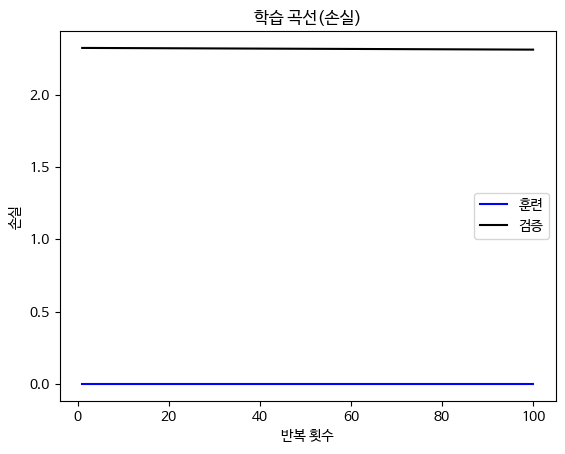

In [61]:
# 학습 곡선 출력(손실)

plt.plot(history[:,0], history[:,1], 'b', label='훈련')
plt.plot(history[:,0], history[:,3], 'k', label='검증')
plt.xlabel('반복 횟수')
plt.ylabel('손실')
plt.title('학습 곡선(손실)')
plt.legend()
plt.show()

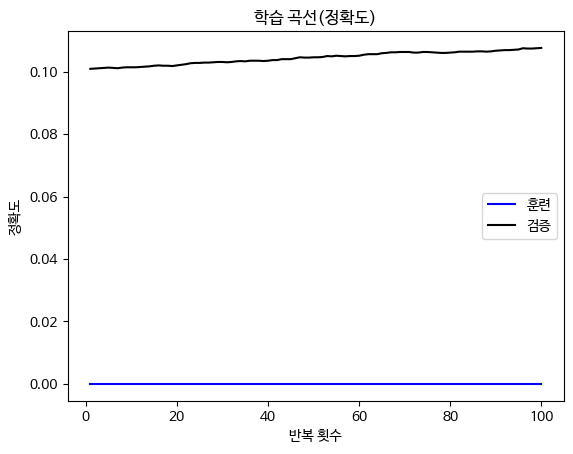

In [62]:
# 학습 곡선 출력(정확도)

plt.plot(history[:,0], history[:,2], 'b', label='훈련')
plt.plot(history[:,0], history[:,4], 'k', label='검증')
plt.xlabel('반복 횟수')
plt.ylabel('정확도')
plt.title('학습 곡선(정확도)')
plt.legend()
plt.show()

#### 8.14 은닉층 추가하기

In [66]:
class Net2(nn.Module):
    def __init__(self,n_input,n_output,n_hidden):
        super().__init__()

        self.l1 = nn.Linear(n_input, n_hidden)
        self.l2 = nn.Linear(n_hidden, n_hidden)
        self.l3 = nn.Linear(n_hidden, n_output)
        self.relu = nn.ReLU(inplace = True)

    def forward(self, x):
        x1 = self.relu(self.l1(x))
        x2 = self.relu(self.l2(x1))
        x3 = self.l3(x2)
        return x3

In [67]:
torch.manual_seed(123)
torch.cuda.manual_seed(123)

net = Net2(n_input, n_output, n_hidden).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

In [68]:
summary(net)
# print(net)

Layer (type:depth-idx)                   Param #
Net2                                     --
├─Linear: 1-1                            100,480
├─Linear: 1-2                            16,512
├─Linear: 1-3                            1,290
├─ReLU: 1-4                              --
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0

In [69]:
for images, labels in test_loader:
    break

inputs = images.to(device)
labels = labels.to(device)

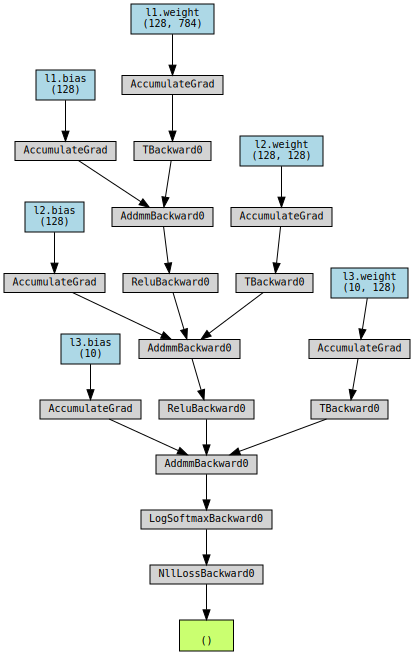

In [70]:
# 예측 계산
outputs = net(inputs)

# 손실 계산
loss = criterion(outputs, labels)

# 손실 계산 그래프 시각화
make_dot(loss, params=dict(net.named_parameters()))

In [71]:
# 경사 계산
loss.backward()

# 경사 계산 결과 일부
w = net.to('cpu').l1.weight.grad.numpy()
print(w)

# 각 요소의 절댓값 평균
print(np.abs(w).mean())

[[-7.0644805e-04 -7.0644805e-04 -7.0644805e-04 ... -7.0644805e-04
  -7.0644805e-04 -7.0644805e-04]
 [-9.6321681e-05 -9.6321681e-05 -9.6321681e-05 ... -9.6321681e-05
  -9.6321681e-05 -9.6321681e-05]
 [-5.2876811e-04 -5.2876811e-04 -5.2876811e-04 ... -5.2876811e-04
  -5.2876811e-04 -5.2876811e-04]
 ...
 [ 1.4766732e-03  1.4766732e-03  1.4766732e-03 ...  1.4766732e-03
   1.4766732e-03  1.4766732e-03]
 [ 2.2889148e-04  2.2889148e-04  2.2889148e-04 ...  2.2889148e-04
   2.2889148e-04  2.2889148e-04]
 [ 2.7689134e-04  2.7689134e-04  2.7689134e-04 ...  2.7689134e-04
   2.7689134e-04  2.7689134e-04]]
0.0008487979


In [72]:
torch.manual_seed(123)
torch.backends.cudnn.deterministic = True
torch.use_deterministic_algorithms = True


# 모델 초기화
net = Net2(n_input, n_output, n_hidden).to(device)

# 손실 함수： 교차 엔트로피 함수
criterion = nn.CrossEntropyLoss()

# 최적화 함수: 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)

# 반복 횟수
num_epochs = 100

# 평가 결과 기록
history2 = np.zeros((0,5))

In [73]:
for epoch in range(num_epochs):
    train_acc = 0
    train_loss = 0
    val_acc = 0
    val_loss = 0
    n_train = 0
    n_test = 0

    # 훈련 페이즈
    for inputs, labels in tqdm(train_loader):
        n_train += len(labels)

        # GPU로 전송
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 경사 초기화
        optimizer.zero_grad()

        # 예측 계산
        outputs = net(inputs)

        # 손실 계산
        loss = criterion(outputs, labels)

        # 경사 계산
        loss.backward()

        # 파라미터 수정
        optimizer.step()

        # 예측 라벨 산출
        predicted = torch.max(outputs, 1)[1]

        # 손실과 정확도 계산
        train_loss += loss.item()
        train_acc += (predicted == labels).sum().item()

    # 예측 페이즈
    for inputs_test, labels_test in test_loader:
        n_test += len(labels_test)

        inputs_test = inputs_test.to(device)
        labels_test = labels_test.to(device)

        # 예측 계산
        outputs_test = net(inputs_test)

        # 손실 계산
        loss_test = criterion(outputs_test, labels_test)

        # 예측 라벨 산출
        predicted_test = torch.max(outputs_test, 1)[1]

        # 손실과 정확도 계산
        val_loss +=  loss_test.item()
        val_acc +=  (predicted_test == labels_test).sum().item()

    # 평가 결과 산출, 기록
    train_acc = train_acc / n_train
    val_acc = val_acc / n_test
    train_loss = train_loss * batch_size / n_train
    val_loss = val_loss * batch_size / n_test
    print (f'Epoch [{epoch+1}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
    item = np.array([epoch+1 , train_loss, train_acc, val_loss, val_acc])
    history2 = np.vstack((history2, item))

  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [1/100], loss: 2.30844 acc: 0.09078 val_loss: 2.30981, val_acc: 0.08910


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [2/100], loss: 2.30842 acc: 0.09082 val_loss: 2.30979, val_acc: 0.08930


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [3/100], loss: 2.30840 acc: 0.09088 val_loss: 2.30977, val_acc: 0.08920


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [4/100], loss: 2.30838 acc: 0.09088 val_loss: 2.30975, val_acc: 0.08920


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [5/100], loss: 2.30837 acc: 0.09098 val_loss: 2.30974, val_acc: 0.08920


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [6/100], loss: 2.30835 acc: 0.09110 val_loss: 2.30972, val_acc: 0.08930


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [7/100], loss: 2.30833 acc: 0.09122 val_loss: 2.30970, val_acc: 0.08940


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [8/100], loss: 2.30831 acc: 0.09130 val_loss: 2.30968, val_acc: 0.08960


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [9/100], loss: 2.30830 acc: 0.09132 val_loss: 2.30967, val_acc: 0.08970


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [10/100], loss: 2.30828 acc: 0.09133 val_loss: 2.30965, val_acc: 0.08970


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [11/100], loss: 2.30826 acc: 0.09140 val_loss: 2.30963, val_acc: 0.08980


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [12/100], loss: 2.30825 acc: 0.09147 val_loss: 2.30961, val_acc: 0.08990


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [13/100], loss: 2.30823 acc: 0.09172 val_loss: 2.30959, val_acc: 0.08990


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [14/100], loss: 2.30821 acc: 0.09180 val_loss: 2.30958, val_acc: 0.09000


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [15/100], loss: 2.30819 acc: 0.09192 val_loss: 2.30956, val_acc: 0.09000


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [16/100], loss: 2.30818 acc: 0.09190 val_loss: 2.30954, val_acc: 0.09020


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [17/100], loss: 2.30816 acc: 0.09205 val_loss: 2.30952, val_acc: 0.09020


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [18/100], loss: 2.30814 acc: 0.09207 val_loss: 2.30951, val_acc: 0.09020


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [19/100], loss: 2.30812 acc: 0.09210 val_loss: 2.30949, val_acc: 0.09050


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [20/100], loss: 2.30811 acc: 0.09217 val_loss: 2.30947, val_acc: 0.09080


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [21/100], loss: 2.30809 acc: 0.09232 val_loss: 2.30945, val_acc: 0.09100


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [22/100], loss: 2.30807 acc: 0.09243 val_loss: 2.30943, val_acc: 0.09110


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [23/100], loss: 2.30806 acc: 0.09245 val_loss: 2.30942, val_acc: 0.09120


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [24/100], loss: 2.30804 acc: 0.09258 val_loss: 2.30940, val_acc: 0.09150


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [25/100], loss: 2.30802 acc: 0.09270 val_loss: 2.30938, val_acc: 0.09140


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [26/100], loss: 2.30800 acc: 0.09268 val_loss: 2.30936, val_acc: 0.09140


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [27/100], loss: 2.30799 acc: 0.09280 val_loss: 2.30935, val_acc: 0.09140


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [28/100], loss: 2.30797 acc: 0.09282 val_loss: 2.30933, val_acc: 0.09140


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [29/100], loss: 2.30795 acc: 0.09287 val_loss: 2.30931, val_acc: 0.09150


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [30/100], loss: 2.30794 acc: 0.09293 val_loss: 2.30929, val_acc: 0.09150


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [31/100], loss: 2.30792 acc: 0.09315 val_loss: 2.30927, val_acc: 0.09180


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [32/100], loss: 2.30790 acc: 0.09327 val_loss: 2.30926, val_acc: 0.09170


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [33/100], loss: 2.30788 acc: 0.09333 val_loss: 2.30924, val_acc: 0.09170


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [34/100], loss: 2.30787 acc: 0.09347 val_loss: 2.30922, val_acc: 0.09170


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [35/100], loss: 2.30785 acc: 0.09355 val_loss: 2.30920, val_acc: 0.09170


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [36/100], loss: 2.30783 acc: 0.09363 val_loss: 2.30919, val_acc: 0.09180


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [37/100], loss: 2.30781 acc: 0.09368 val_loss: 2.30917, val_acc: 0.09200


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [38/100], loss: 2.30780 acc: 0.09378 val_loss: 2.30915, val_acc: 0.09210


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [39/100], loss: 2.30778 acc: 0.09383 val_loss: 2.30913, val_acc: 0.09220


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [40/100], loss: 2.30776 acc: 0.09387 val_loss: 2.30911, val_acc: 0.09230


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [41/100], loss: 2.30775 acc: 0.09393 val_loss: 2.30910, val_acc: 0.09250


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [42/100], loss: 2.30773 acc: 0.09410 val_loss: 2.30908, val_acc: 0.09250


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [43/100], loss: 2.30771 acc: 0.09415 val_loss: 2.30906, val_acc: 0.09260


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [44/100], loss: 2.30769 acc: 0.09428 val_loss: 2.30904, val_acc: 0.09270


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [45/100], loss: 2.30768 acc: 0.09440 val_loss: 2.30903, val_acc: 0.09270


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [46/100], loss: 2.30766 acc: 0.09452 val_loss: 2.30901, val_acc: 0.09290


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [47/100], loss: 2.30764 acc: 0.09455 val_loss: 2.30899, val_acc: 0.09300


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [48/100], loss: 2.30763 acc: 0.09467 val_loss: 2.30897, val_acc: 0.09330


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [49/100], loss: 2.30761 acc: 0.09478 val_loss: 2.30896, val_acc: 0.09340


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [50/100], loss: 2.30759 acc: 0.09495 val_loss: 2.30894, val_acc: 0.09340


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [51/100], loss: 2.30757 acc: 0.09500 val_loss: 2.30892, val_acc: 0.09370


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [52/100], loss: 2.30756 acc: 0.09510 val_loss: 2.30890, val_acc: 0.09410


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [53/100], loss: 2.30754 acc: 0.09520 val_loss: 2.30888, val_acc: 0.09440


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [54/100], loss: 2.30752 acc: 0.09523 val_loss: 2.30887, val_acc: 0.09450


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [55/100], loss: 2.30751 acc: 0.09537 val_loss: 2.30885, val_acc: 0.09470


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [56/100], loss: 2.30749 acc: 0.09543 val_loss: 2.30883, val_acc: 0.09490


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [57/100], loss: 2.30747 acc: 0.09538 val_loss: 2.30881, val_acc: 0.09520


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [58/100], loss: 2.30745 acc: 0.09538 val_loss: 2.30880, val_acc: 0.09520


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [59/100], loss: 2.30744 acc: 0.09542 val_loss: 2.30878, val_acc: 0.09520


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [60/100], loss: 2.30742 acc: 0.09552 val_loss: 2.30876, val_acc: 0.09520


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [61/100], loss: 2.30740 acc: 0.09557 val_loss: 2.30874, val_acc: 0.09520


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [62/100], loss: 2.30739 acc: 0.09567 val_loss: 2.30872, val_acc: 0.09520


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [63/100], loss: 2.30737 acc: 0.09578 val_loss: 2.30871, val_acc: 0.09510


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [64/100], loss: 2.30735 acc: 0.09585 val_loss: 2.30869, val_acc: 0.09520


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [65/100], loss: 2.30733 acc: 0.09597 val_loss: 2.30867, val_acc: 0.09590


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [66/100], loss: 2.30732 acc: 0.09610 val_loss: 2.30865, val_acc: 0.09600


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [67/100], loss: 2.30730 acc: 0.09622 val_loss: 2.30864, val_acc: 0.09610


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [68/100], loss: 2.30728 acc: 0.09623 val_loss: 2.30862, val_acc: 0.09610


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [69/100], loss: 2.30726 acc: 0.09638 val_loss: 2.30860, val_acc: 0.09620


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [70/100], loss: 2.30725 acc: 0.09647 val_loss: 2.30858, val_acc: 0.09630


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [71/100], loss: 2.30723 acc: 0.09665 val_loss: 2.30857, val_acc: 0.09630


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [72/100], loss: 2.30721 acc: 0.09670 val_loss: 2.30855, val_acc: 0.09660


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [73/100], loss: 2.30720 acc: 0.09682 val_loss: 2.30853, val_acc: 0.09670


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [74/100], loss: 2.30718 acc: 0.09698 val_loss: 2.30851, val_acc: 0.09690


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [75/100], loss: 2.30716 acc: 0.09707 val_loss: 2.30849, val_acc: 0.09710


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [76/100], loss: 2.30714 acc: 0.09713 val_loss: 2.30848, val_acc: 0.09720


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [77/100], loss: 2.30713 acc: 0.09738 val_loss: 2.30846, val_acc: 0.09730


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [78/100], loss: 2.30711 acc: 0.09750 val_loss: 2.30844, val_acc: 0.09750


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [79/100], loss: 2.30709 acc: 0.09767 val_loss: 2.30842, val_acc: 0.09760


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [80/100], loss: 2.30708 acc: 0.09783 val_loss: 2.30841, val_acc: 0.09790


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [81/100], loss: 2.30706 acc: 0.09803 val_loss: 2.30839, val_acc: 0.09820


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [82/100], loss: 2.30704 acc: 0.09817 val_loss: 2.30837, val_acc: 0.09840


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [83/100], loss: 2.30702 acc: 0.09825 val_loss: 2.30835, val_acc: 0.09860


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [84/100], loss: 2.30701 acc: 0.09842 val_loss: 2.30834, val_acc: 0.09880


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [85/100], loss: 2.30699 acc: 0.09853 val_loss: 2.30832, val_acc: 0.09890


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [86/100], loss: 2.30697 acc: 0.09868 val_loss: 2.30830, val_acc: 0.09900


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [87/100], loss: 2.30696 acc: 0.09880 val_loss: 2.30828, val_acc: 0.09890


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [88/100], loss: 2.30694 acc: 0.09888 val_loss: 2.30826, val_acc: 0.09900


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [89/100], loss: 2.30692 acc: 0.09900 val_loss: 2.30825, val_acc: 0.09930


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [90/100], loss: 2.30690 acc: 0.09915 val_loss: 2.30823, val_acc: 0.09930


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [91/100], loss: 2.30689 acc: 0.09925 val_loss: 2.30821, val_acc: 0.09940


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [92/100], loss: 2.30687 acc: 0.09930 val_loss: 2.30819, val_acc: 0.09950


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [93/100], loss: 2.30685 acc: 0.09937 val_loss: 2.30818, val_acc: 0.09960


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [94/100], loss: 2.30684 acc: 0.09945 val_loss: 2.30816, val_acc: 0.09960


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [95/100], loss: 2.30682 acc: 0.09962 val_loss: 2.30814, val_acc: 0.09960


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [96/100], loss: 2.30680 acc: 0.09970 val_loss: 2.30812, val_acc: 0.10000


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [97/100], loss: 2.30678 acc: 0.09990 val_loss: 2.30811, val_acc: 0.10030


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [98/100], loss: 2.30677 acc: 0.09997 val_loss: 2.30809, val_acc: 0.10030


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [99/100], loss: 2.30675 acc: 0.10015 val_loss: 2.30807, val_acc: 0.10060


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [100/100], loss: 2.30673 acc: 0.10032 val_loss: 2.30805, val_acc: 0.10060


In [74]:
# 손실과 정확도 확인

print(f'초기상태 : 손실 : {history2[0,3]:.5f}  정확도 : {history2[0,4]:.5f}' )
print(f'최종상태 : 손실 : {history2[-1,3]:.5f}  정확도 : {history2[-1,4]:.5f}' )

초기상태 : 손실 : 2.30981  정확도 : 0.08910
최종상태 : 손실 : 2.30805  정확도 : 0.10060


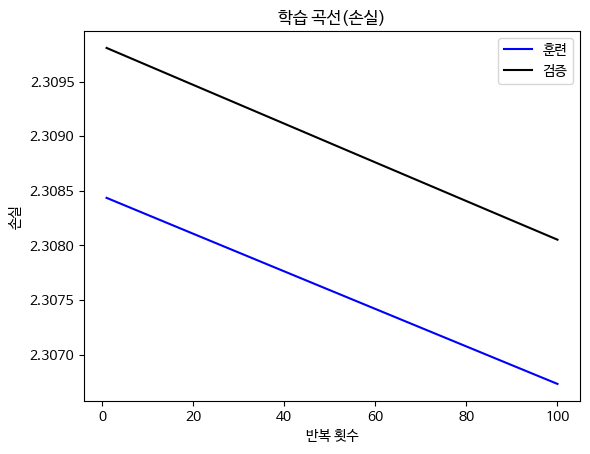

In [75]:
# 학습 곡선 출력(손실)
plt.plot(history2[:,0], history2[:,1], 'b', label='훈련')
plt.plot(history2[:,0], history2[:,3], 'k', label='검증')
plt.xlabel('반복 횟수')
plt.ylabel('손실')
plt.title('학습 곡선(손실)')
plt.legend()
plt.show()

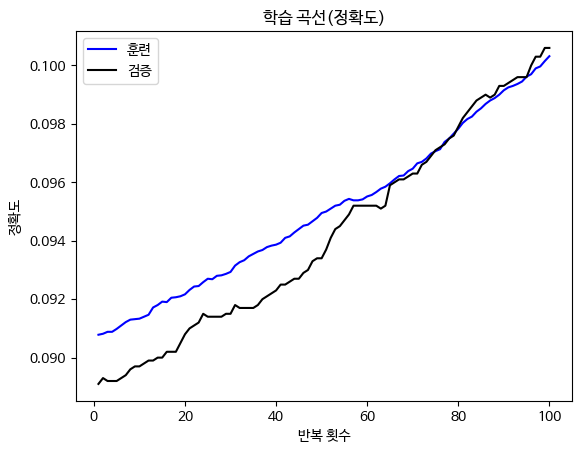

In [76]:
# 학습 곡선 출력(정확도)

plt.plot(history2[:,0], history2[:,2], 'b', label='훈련')
plt.plot(history2[:,0], history2[:,4], 'k', label='검증')
plt.xlabel('반복 횟수')
plt.ylabel('정확도')
plt.title('학습 곡선(정확도)')
plt.legend()
plt.show()

칼럼) 경사 소실과 ReLU 함수

In [77]:
class Net3(nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super().__init__()

        self.l1 = nn.Linear(n_input, n_hidden)
        self.l2 = nn.Linear(n_hidden, n_hidden)
        self.l3 = nn.Linear(n_hidden, n_output)

        # 시그모이드 함수 정의
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.sigmoid(x1)
        x3 = self.l2(x2)
        x4 = self.sigmoid(x3)
        x5 = self.l3(x4)
        return x5

In [78]:
# 난수 고정
torch.manual_seed(123)
torch.cuda.manual_seed(123)

# 모델 초기화
net = Net3(n_input, n_output, n_hidden).to(device)

# 손실 함수： 교차 엔트로피 함수
criterion = nn.CrossEntropyLoss()

# 최적화 함수: 경사 하강법
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

In [79]:
# 데이터로더에서 처음 한 세트 가져오기
for images, labels in test_loader:
    break

# 예측 결과 가져오기
inputs = images.to(device)
labels = labels.to(device)

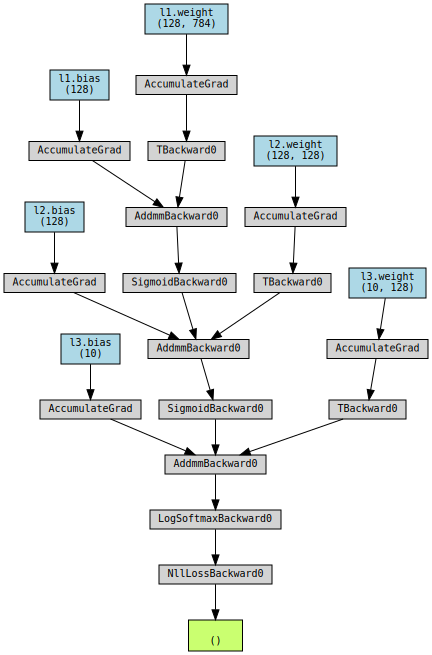

In [80]:
# 예측 계산
outputs = net(inputs)

# 손실 계산
loss = criterion(outputs, labels)

# 손실 계산 그래프 시각화
make_dot(loss, params=dict(net.named_parameters()))

In [81]:
# 경사 계산
loss.backward()

# 경사 계산 결과의 일부
w = net.to('cpu').l1.weight.grad.numpy()
print(w)

# 각 요소의 절댓값 평균
print(np.abs(w).mean())

[[ 1.2322082e-04  1.2322082e-04  1.2322082e-04 ...  1.2322082e-04
   1.2322082e-04  1.2322082e-04]
 [ 1.3834979e-04  1.3834979e-04  1.3834979e-04 ...  1.3834979e-04
   1.3834979e-04  1.3834979e-04]
 [-1.3905090e-04 -1.3905090e-04 -1.3905090e-04 ... -1.3905090e-04
  -1.3905090e-04 -1.3905090e-04]
 ...
 [-1.3453046e-04 -1.3453046e-04 -1.3453046e-04 ... -1.3453046e-04
  -1.3453046e-04 -1.3453046e-04]
 [ 1.7736154e-04  1.7736154e-04  1.7736154e-04 ...  1.7736154e-04
   1.7736154e-04  1.7736154e-04]
 [-8.7189750e-05 -8.7189750e-05 -8.7189750e-05 ... -8.7189750e-05
  -8.7189750e-05 -8.7189750e-05]]
0.00017514593


#### 배치사이즈 테스트

In [82]:
def fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history):
    base_epochs = len(history)
    for epoch in range(base_epochs, num_epochs+base_epochs):
        train_loss = 0
        train_acc = 0
        val_loss = 0
        val_acc = 0

        # 훈련 페이즈
        count = 0

        for inputs, labels in tqdm(train_loader):
            count += len(labels)
            inputs = inputs.to(device)
            labels = labels.to(device)

            # 경사 초기화
            optimizer.zero_grad()

            # 예측 계산
            outputs = net(inputs)

            # 손실 계산
            loss = criterion(outputs, labels)
            train_loss += loss.item()

            # 경사 계산
            loss.backward()

            # 파라미터 수정
            optimizer.step()

            # 예측 라벨 산출
            predicted = torch.max(outputs, 1)[1]

            # 정답 건수 산출
            train_acc += (predicted == labels).sum().item()

            # 훈련 데이터에 대해 손실과 정확도 계산
            avg_train_loss = train_loss / count
            avg_train_acc = train_acc / count

        # 예측 페이즈
        count = 0

        for inputs, labels in test_loader:
            count += len(labels)

            inputs = inputs.to(device)
            labels = labels.to(device)

            # 예측 계산
            outputs = net(inputs)

            # 손실 계산
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # 예측 라벨 산출
            predicted = torch.max(outputs, 1)[1]

            # 정답 건수 산출
            val_acc += (predicted == labels).sum().item()

            # 검증 데이터에 대해 손실과 정확도 계산
            avg_val_loss = val_loss / count
            avg_val_acc = val_acc / count

        print (f'Epoch [{(epoch+1)}/{num_epochs+base_epochs}], loss: {avg_train_loss:.5f} acc: {avg_train_acc:.5f} val_loss: {avg_val_loss:.5f}, val_acc: {avg_val_acc:.5f}')
        item = np.array([epoch+1, avg_train_loss, avg_train_acc, avg_val_loss, avg_val_acc])
        history = np.vstack((history, item))
    return history

In [83]:
# 파이토치 난수 고정

def torch_seed(seed=123):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

In [84]:
# 미니 배치 사이즈 지정
batch_size_train = 500

# 훈련용 데이터로더
# 훈련용이므로 셔플을 적용함
train_loader = DataLoader(
    train_set, batch_size = batch_size_train,
    shuffle = True)

# 난수 고정
torch_seed()

# 학습률
lr = 0.01

# 모델 초기화
net = Net(n_input, n_output, n_hidden).to(device)

# 최적화 함수: 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)

# 손실 함수： 교차 엔트로피 함수
criterion = nn.CrossEntropyLoss()

# 반복 횟수
num_epochs = 100

# 평가 결과 기록
history6 = np.zeros((0,5))

In [85]:
history6 = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history6)

  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [1/100], loss: 0.00366 acc: 0.56958 val_loss: 0.00265, val_acc: 0.74660


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [2/100], loss: 0.00208 acc: 0.79537 val_loss: 0.00159, val_acc: 0.83180


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [3/100], loss: 0.00142 acc: 0.84110 val_loss: 0.00121, val_acc: 0.85850


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [4/100], loss: 0.00115 acc: 0.86057 val_loss: 0.00102, val_acc: 0.87140


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [5/100], loss: 0.00100 acc: 0.87102 val_loss: 0.00092, val_acc: 0.87920


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [6/100], loss: 0.00092 acc: 0.87878 val_loss: 0.00085, val_acc: 0.88650


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [7/100], loss: 0.00086 acc: 0.88327 val_loss: 0.00080, val_acc: 0.88970


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [8/100], loss: 0.00082 acc: 0.88743 val_loss: 0.00077, val_acc: 0.89370


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [9/100], loss: 0.00078 acc: 0.89065 val_loss: 0.00074, val_acc: 0.89680


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [10/100], loss: 0.00076 acc: 0.89313 val_loss: 0.00071, val_acc: 0.89930


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [11/100], loss: 0.00074 acc: 0.89592 val_loss: 0.00070, val_acc: 0.90160


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [12/100], loss: 0.00072 acc: 0.89783 val_loss: 0.00068, val_acc: 0.90220


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [13/100], loss: 0.00070 acc: 0.89977 val_loss: 0.00067, val_acc: 0.90490


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [14/100], loss: 0.00069 acc: 0.90135 val_loss: 0.00066, val_acc: 0.90570


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [15/100], loss: 0.00068 acc: 0.90310 val_loss: 0.00065, val_acc: 0.90710


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [16/100], loss: 0.00067 acc: 0.90412 val_loss: 0.00064, val_acc: 0.90790


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [17/100], loss: 0.00066 acc: 0.90520 val_loss: 0.00063, val_acc: 0.90930


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [18/100], loss: 0.00065 acc: 0.90700 val_loss: 0.00062, val_acc: 0.91090


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [19/100], loss: 0.00064 acc: 0.90807 val_loss: 0.00061, val_acc: 0.91190


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [20/100], loss: 0.00063 acc: 0.90905 val_loss: 0.00061, val_acc: 0.91240


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [21/100], loss: 0.00062 acc: 0.91032 val_loss: 0.00060, val_acc: 0.91520


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [22/100], loss: 0.00062 acc: 0.91098 val_loss: 0.00059, val_acc: 0.91430


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [23/100], loss: 0.00061 acc: 0.91195 val_loss: 0.00059, val_acc: 0.91570


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [24/100], loss: 0.00060 acc: 0.91320 val_loss: 0.00058, val_acc: 0.91770


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [25/100], loss: 0.00060 acc: 0.91403 val_loss: 0.00058, val_acc: 0.91700


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [26/100], loss: 0.00059 acc: 0.91492 val_loss: 0.00057, val_acc: 0.91820


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [27/100], loss: 0.00059 acc: 0.91662 val_loss: 0.00057, val_acc: 0.91950


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [28/100], loss: 0.00058 acc: 0.91698 val_loss: 0.00056, val_acc: 0.92000


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [29/100], loss: 0.00058 acc: 0.91798 val_loss: 0.00056, val_acc: 0.91950


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [30/100], loss: 0.00057 acc: 0.91858 val_loss: 0.00055, val_acc: 0.92110


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [31/100], loss: 0.00056 acc: 0.91958 val_loss: 0.00055, val_acc: 0.92180


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [32/100], loss: 0.00056 acc: 0.92040 val_loss: 0.00055, val_acc: 0.92120


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [33/100], loss: 0.00056 acc: 0.92067 val_loss: 0.00054, val_acc: 0.92210


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [34/100], loss: 0.00055 acc: 0.92102 val_loss: 0.00054, val_acc: 0.92410


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [35/100], loss: 0.00055 acc: 0.92242 val_loss: 0.00053, val_acc: 0.92430


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [36/100], loss: 0.00054 acc: 0.92280 val_loss: 0.00053, val_acc: 0.92360


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [37/100], loss: 0.00054 acc: 0.92358 val_loss: 0.00053, val_acc: 0.92440


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [38/100], loss: 0.00053 acc: 0.92403 val_loss: 0.00052, val_acc: 0.92550


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [39/100], loss: 0.00053 acc: 0.92455 val_loss: 0.00052, val_acc: 0.92580


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [40/100], loss: 0.00052 acc: 0.92565 val_loss: 0.00051, val_acc: 0.92660


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [41/100], loss: 0.00052 acc: 0.92603 val_loss: 0.00051, val_acc: 0.92630


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [42/100], loss: 0.00051 acc: 0.92695 val_loss: 0.00051, val_acc: 0.92720


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [43/100], loss: 0.00051 acc: 0.92765 val_loss: 0.00050, val_acc: 0.92940


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [44/100], loss: 0.00051 acc: 0.92775 val_loss: 0.00050, val_acc: 0.92800


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [45/100], loss: 0.00050 acc: 0.92845 val_loss: 0.00049, val_acc: 0.92930


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [46/100], loss: 0.00050 acc: 0.92937 val_loss: 0.00049, val_acc: 0.93070


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [47/100], loss: 0.00049 acc: 0.92965 val_loss: 0.00049, val_acc: 0.93100


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [48/100], loss: 0.00049 acc: 0.93042 val_loss: 0.00049, val_acc: 0.93060


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [49/100], loss: 0.00049 acc: 0.93060 val_loss: 0.00048, val_acc: 0.93220


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [50/100], loss: 0.00048 acc: 0.93147 val_loss: 0.00048, val_acc: 0.93250


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [51/100], loss: 0.00048 acc: 0.93212 val_loss: 0.00047, val_acc: 0.93300


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [52/100], loss: 0.00047 acc: 0.93225 val_loss: 0.00047, val_acc: 0.93290


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [53/100], loss: 0.00047 acc: 0.93345 val_loss: 0.00047, val_acc: 0.93310


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [54/100], loss: 0.00047 acc: 0.93442 val_loss: 0.00046, val_acc: 0.93430


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [55/100], loss: 0.00046 acc: 0.93478 val_loss: 0.00046, val_acc: 0.93460


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [56/100], loss: 0.00046 acc: 0.93517 val_loss: 0.00046, val_acc: 0.93460


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [57/100], loss: 0.00045 acc: 0.93568 val_loss: 0.00045, val_acc: 0.93600


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [58/100], loss: 0.00045 acc: 0.93643 val_loss: 0.00045, val_acc: 0.93580


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [59/100], loss: 0.00045 acc: 0.93693 val_loss: 0.00045, val_acc: 0.93600


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [60/100], loss: 0.00044 acc: 0.93743 val_loss: 0.00044, val_acc: 0.93630


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [61/100], loss: 0.00044 acc: 0.93808 val_loss: 0.00044, val_acc: 0.93690


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [62/100], loss: 0.00044 acc: 0.93840 val_loss: 0.00044, val_acc: 0.93770


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [63/100], loss: 0.00043 acc: 0.93903 val_loss: 0.00043, val_acc: 0.93720


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [64/100], loss: 0.00043 acc: 0.93970 val_loss: 0.00043, val_acc: 0.93910


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [65/100], loss: 0.00043 acc: 0.94003 val_loss: 0.00043, val_acc: 0.93830


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [66/100], loss: 0.00042 acc: 0.94050 val_loss: 0.00042, val_acc: 0.93890


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [67/100], loss: 0.00042 acc: 0.94112 val_loss: 0.00042, val_acc: 0.93960


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [68/100], loss: 0.00042 acc: 0.94157 val_loss: 0.00042, val_acc: 0.94000


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [69/100], loss: 0.00041 acc: 0.94210 val_loss: 0.00041, val_acc: 0.94000


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [70/100], loss: 0.00041 acc: 0.94235 val_loss: 0.00041, val_acc: 0.94000


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [71/100], loss: 0.00041 acc: 0.94292 val_loss: 0.00041, val_acc: 0.94080


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [72/100], loss: 0.00040 acc: 0.94355 val_loss: 0.00041, val_acc: 0.94120


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [73/100], loss: 0.00040 acc: 0.94373 val_loss: 0.00040, val_acc: 0.94110


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [74/100], loss: 0.00040 acc: 0.94420 val_loss: 0.00040, val_acc: 0.94240


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [75/100], loss: 0.00040 acc: 0.94453 val_loss: 0.00040, val_acc: 0.94270


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [76/100], loss: 0.00039 acc: 0.94513 val_loss: 0.00040, val_acc: 0.94270


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [77/100], loss: 0.00039 acc: 0.94533 val_loss: 0.00039, val_acc: 0.94330


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [78/100], loss: 0.00039 acc: 0.94565 val_loss: 0.00039, val_acc: 0.94430


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [79/100], loss: 0.00038 acc: 0.94620 val_loss: 0.00039, val_acc: 0.94430


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [80/100], loss: 0.00038 acc: 0.94635 val_loss: 0.00039, val_acc: 0.94360


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [81/100], loss: 0.00038 acc: 0.94713 val_loss: 0.00038, val_acc: 0.94340


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [82/100], loss: 0.00038 acc: 0.94737 val_loss: 0.00038, val_acc: 0.94470


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [83/100], loss: 0.00037 acc: 0.94795 val_loss: 0.00038, val_acc: 0.94570


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [84/100], loss: 0.00037 acc: 0.94812 val_loss: 0.00038, val_acc: 0.94500


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [85/100], loss: 0.00037 acc: 0.94818 val_loss: 0.00037, val_acc: 0.94610


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [86/100], loss: 0.00036 acc: 0.94888 val_loss: 0.00037, val_acc: 0.94620


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [87/100], loss: 0.00036 acc: 0.94955 val_loss: 0.00037, val_acc: 0.94570


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [88/100], loss: 0.00036 acc: 0.94977 val_loss: 0.00037, val_acc: 0.94700


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [89/100], loss: 0.00036 acc: 0.95025 val_loss: 0.00036, val_acc: 0.94720


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [90/100], loss: 0.00035 acc: 0.95042 val_loss: 0.00036, val_acc: 0.94730


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [91/100], loss: 0.00035 acc: 0.95097 val_loss: 0.00036, val_acc: 0.94780


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [92/100], loss: 0.00035 acc: 0.95118 val_loss: 0.00036, val_acc: 0.94800


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [93/100], loss: 0.00035 acc: 0.95140 val_loss: 0.00035, val_acc: 0.94810


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [94/100], loss: 0.00035 acc: 0.95175 val_loss: 0.00035, val_acc: 0.94810


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [95/100], loss: 0.00034 acc: 0.95218 val_loss: 0.00035, val_acc: 0.94890


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [96/100], loss: 0.00034 acc: 0.95275 val_loss: 0.00035, val_acc: 0.94810


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [97/100], loss: 0.00034 acc: 0.95272 val_loss: 0.00035, val_acc: 0.94830


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [98/100], loss: 0.00034 acc: 0.95332 val_loss: 0.00035, val_acc: 0.94830


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [99/100], loss: 0.00033 acc: 0.95357 val_loss: 0.00034, val_acc: 0.94830


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [100/100], loss: 0.00033 acc: 0.95408 val_loss: 0.00034, val_acc: 0.94960


In [86]:
# 미니 배치 사이즈 지정
batch_size_train = 200

# 훈련용 데이터로더
# 훈련용이므로 셔플을 적용함
train_loader = DataLoader(
    train_set, batch_size = batch_size_train,
    shuffle = True)

# 난수 고정
torch_seed()

# 학습률
lr = 0.01

# 모델 초기화
net = Net(n_input, n_output, n_hidden).to(device)

# 최적화 함수: 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)

# 손실 함수： 교차 엔트로피 함수
criterion = nn.CrossEntropyLoss()

# 반복 횟수
num_epochs = 100

# 평가 결과 기록
history3 = np.zeros((0,5))

In [87]:
history3 = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history3)

  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [1/100], loss: 0.00650 acc: 0.71105 val_loss: 0.00136, val_acc: 0.84730


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [2/100], loss: 0.00282 acc: 0.86208 val_loss: 0.00092, val_acc: 0.87970


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [3/100], loss: 0.00220 acc: 0.88187 val_loss: 0.00078, val_acc: 0.89220


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [4/100], loss: 0.00195 acc: 0.89072 val_loss: 0.00072, val_acc: 0.89740


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [5/100], loss: 0.00182 acc: 0.89675 val_loss: 0.00068, val_acc: 0.90370


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [6/100], loss: 0.00172 acc: 0.90108 val_loss: 0.00065, val_acc: 0.90620


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [7/100], loss: 0.00166 acc: 0.90438 val_loss: 0.00063, val_acc: 0.91120


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [8/100], loss: 0.00160 acc: 0.90783 val_loss: 0.00061, val_acc: 0.91430


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [9/100], loss: 0.00155 acc: 0.91027 val_loss: 0.00059, val_acc: 0.91330


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [10/100], loss: 0.00151 acc: 0.91283 val_loss: 0.00058, val_acc: 0.91760


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [11/100], loss: 0.00147 acc: 0.91478 val_loss: 0.00057, val_acc: 0.91950


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [12/100], loss: 0.00144 acc: 0.91785 val_loss: 0.00056, val_acc: 0.92010


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [13/100], loss: 0.00141 acc: 0.91972 val_loss: 0.00054, val_acc: 0.92250


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [14/100], loss: 0.00138 acc: 0.92125 val_loss: 0.00053, val_acc: 0.92340


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [15/100], loss: 0.00135 acc: 0.92300 val_loss: 0.00052, val_acc: 0.92450


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [16/100], loss: 0.00132 acc: 0.92455 val_loss: 0.00051, val_acc: 0.92550


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [17/100], loss: 0.00129 acc: 0.92605 val_loss: 0.00051, val_acc: 0.92780


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [18/100], loss: 0.00127 acc: 0.92753 val_loss: 0.00050, val_acc: 0.92850


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [19/100], loss: 0.00124 acc: 0.92932 val_loss: 0.00048, val_acc: 0.92980


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [20/100], loss: 0.00122 acc: 0.93038 val_loss: 0.00048, val_acc: 0.93160


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [21/100], loss: 0.00119 acc: 0.93262 val_loss: 0.00047, val_acc: 0.93470


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [22/100], loss: 0.00117 acc: 0.93392 val_loss: 0.00046, val_acc: 0.93440


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [23/100], loss: 0.00114 acc: 0.93517 val_loss: 0.00045, val_acc: 0.93550


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [24/100], loss: 0.00112 acc: 0.93653 val_loss: 0.00044, val_acc: 0.93580


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [25/100], loss: 0.00110 acc: 0.93833 val_loss: 0.00044, val_acc: 0.93710


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [26/100], loss: 0.00108 acc: 0.93915 val_loss: 0.00043, val_acc: 0.93710


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [27/100], loss: 0.00106 acc: 0.94053 val_loss: 0.00042, val_acc: 0.93980


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [28/100], loss: 0.00103 acc: 0.94178 val_loss: 0.00041, val_acc: 0.94140


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [29/100], loss: 0.00101 acc: 0.94297 val_loss: 0.00041, val_acc: 0.94090


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [30/100], loss: 0.00100 acc: 0.94397 val_loss: 0.00040, val_acc: 0.94170


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [31/100], loss: 0.00098 acc: 0.94478 val_loss: 0.00039, val_acc: 0.94370


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [32/100], loss: 0.00096 acc: 0.94625 val_loss: 0.00038, val_acc: 0.94450


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [33/100], loss: 0.00094 acc: 0.94718 val_loss: 0.00038, val_acc: 0.94590


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [34/100], loss: 0.00093 acc: 0.94807 val_loss: 0.00037, val_acc: 0.94690


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [35/100], loss: 0.00091 acc: 0.94865 val_loss: 0.00037, val_acc: 0.94740


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [36/100], loss: 0.00089 acc: 0.94982 val_loss: 0.00036, val_acc: 0.94610


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [37/100], loss: 0.00088 acc: 0.95048 val_loss: 0.00035, val_acc: 0.94790


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [38/100], loss: 0.00086 acc: 0.95182 val_loss: 0.00035, val_acc: 0.94860


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [39/100], loss: 0.00085 acc: 0.95240 val_loss: 0.00035, val_acc: 0.94840


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [40/100], loss: 0.00084 acc: 0.95348 val_loss: 0.00034, val_acc: 0.94940


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [41/100], loss: 0.00082 acc: 0.95447 val_loss: 0.00034, val_acc: 0.94940


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [42/100], loss: 0.00081 acc: 0.95473 val_loss: 0.00033, val_acc: 0.95090


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [43/100], loss: 0.00080 acc: 0.95557 val_loss: 0.00033, val_acc: 0.95090


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [44/100], loss: 0.00079 acc: 0.95597 val_loss: 0.00032, val_acc: 0.95190


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [45/100], loss: 0.00077 acc: 0.95663 val_loss: 0.00032, val_acc: 0.95310


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [46/100], loss: 0.00076 acc: 0.95740 val_loss: 0.00032, val_acc: 0.95420


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [47/100], loss: 0.00075 acc: 0.95750 val_loss: 0.00031, val_acc: 0.95370


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [48/100], loss: 0.00074 acc: 0.95865 val_loss: 0.00031, val_acc: 0.95390


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [49/100], loss: 0.00073 acc: 0.95905 val_loss: 0.00030, val_acc: 0.95470


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [50/100], loss: 0.00072 acc: 0.95950 val_loss: 0.00030, val_acc: 0.95500


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [51/100], loss: 0.00071 acc: 0.96025 val_loss: 0.00030, val_acc: 0.95530


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [52/100], loss: 0.00070 acc: 0.96100 val_loss: 0.00030, val_acc: 0.95550


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [53/100], loss: 0.00069 acc: 0.96153 val_loss: 0.00029, val_acc: 0.95670


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [54/100], loss: 0.00068 acc: 0.96153 val_loss: 0.00029, val_acc: 0.95740


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [55/100], loss: 0.00067 acc: 0.96238 val_loss: 0.00028, val_acc: 0.95700


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [56/100], loss: 0.00066 acc: 0.96318 val_loss: 0.00028, val_acc: 0.95800


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [57/100], loss: 0.00065 acc: 0.96323 val_loss: 0.00028, val_acc: 0.95880


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [58/100], loss: 0.00065 acc: 0.96418 val_loss: 0.00028, val_acc: 0.95920


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [59/100], loss: 0.00064 acc: 0.96423 val_loss: 0.00027, val_acc: 0.95960


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [60/100], loss: 0.00063 acc: 0.96450 val_loss: 0.00027, val_acc: 0.96060


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [61/100], loss: 0.00062 acc: 0.96487 val_loss: 0.00027, val_acc: 0.96070


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [62/100], loss: 0.00062 acc: 0.96558 val_loss: 0.00027, val_acc: 0.96190


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [63/100], loss: 0.00061 acc: 0.96608 val_loss: 0.00026, val_acc: 0.96160


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [64/100], loss: 0.00060 acc: 0.96667 val_loss: 0.00026, val_acc: 0.96210


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [65/100], loss: 0.00059 acc: 0.96700 val_loss: 0.00026, val_acc: 0.96270


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [66/100], loss: 0.00059 acc: 0.96765 val_loss: 0.00026, val_acc: 0.96270


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [67/100], loss: 0.00058 acc: 0.96782 val_loss: 0.00026, val_acc: 0.96270


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [68/100], loss: 0.00057 acc: 0.96793 val_loss: 0.00025, val_acc: 0.96350


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [69/100], loss: 0.00057 acc: 0.96882 val_loss: 0.00025, val_acc: 0.96410


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [70/100], loss: 0.00056 acc: 0.96875 val_loss: 0.00025, val_acc: 0.96450


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [71/100], loss: 0.00055 acc: 0.96893 val_loss: 0.00024, val_acc: 0.96410


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [72/100], loss: 0.00055 acc: 0.96983 val_loss: 0.00025, val_acc: 0.96440


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [73/100], loss: 0.00054 acc: 0.96988 val_loss: 0.00024, val_acc: 0.96540


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [74/100], loss: 0.00054 acc: 0.97040 val_loss: 0.00024, val_acc: 0.96520


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [75/100], loss: 0.00053 acc: 0.97085 val_loss: 0.00024, val_acc: 0.96550


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [76/100], loss: 0.00052 acc: 0.97120 val_loss: 0.00024, val_acc: 0.96570


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [77/100], loss: 0.00052 acc: 0.97135 val_loss: 0.00023, val_acc: 0.96630


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [78/100], loss: 0.00051 acc: 0.97163 val_loss: 0.00023, val_acc: 0.96630


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [79/100], loss: 0.00051 acc: 0.97175 val_loss: 0.00023, val_acc: 0.96620


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [80/100], loss: 0.00050 acc: 0.97202 val_loss: 0.00023, val_acc: 0.96680


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [81/100], loss: 0.00050 acc: 0.97227 val_loss: 0.00023, val_acc: 0.96640


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [82/100], loss: 0.00049 acc: 0.97263 val_loss: 0.00023, val_acc: 0.96720


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [83/100], loss: 0.00049 acc: 0.97312 val_loss: 0.00023, val_acc: 0.96790


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [84/100], loss: 0.00048 acc: 0.97357 val_loss: 0.00022, val_acc: 0.96710


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [85/100], loss: 0.00048 acc: 0.97362 val_loss: 0.00022, val_acc: 0.96820


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [86/100], loss: 0.00047 acc: 0.97410 val_loss: 0.00022, val_acc: 0.96780


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [87/100], loss: 0.00047 acc: 0.97425 val_loss: 0.00022, val_acc: 0.96830


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [88/100], loss: 0.00046 acc: 0.97462 val_loss: 0.00022, val_acc: 0.96870


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [89/100], loss: 0.00046 acc: 0.97502 val_loss: 0.00021, val_acc: 0.96830


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [90/100], loss: 0.00045 acc: 0.97515 val_loss: 0.00021, val_acc: 0.96850


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [91/100], loss: 0.00045 acc: 0.97515 val_loss: 0.00021, val_acc: 0.96900


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [92/100], loss: 0.00045 acc: 0.97568 val_loss: 0.00021, val_acc: 0.96910


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [93/100], loss: 0.00044 acc: 0.97598 val_loss: 0.00021, val_acc: 0.96900


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [94/100], loss: 0.00044 acc: 0.97572 val_loss: 0.00021, val_acc: 0.96890


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [95/100], loss: 0.00043 acc: 0.97618 val_loss: 0.00021, val_acc: 0.96860


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [96/100], loss: 0.00043 acc: 0.97650 val_loss: 0.00021, val_acc: 0.96950


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [97/100], loss: 0.00042 acc: 0.97705 val_loss: 0.00021, val_acc: 0.97010


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [98/100], loss: 0.00042 acc: 0.97717 val_loss: 0.00021, val_acc: 0.96950


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [99/100], loss: 0.00042 acc: 0.97693 val_loss: 0.00020, val_acc: 0.97040


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [100/100], loss: 0.00041 acc: 0.97760 val_loss: 0.00020, val_acc: 0.97010


In [88]:
# 미니 배치 사이즈 지정
batch_size_train = 100

# 훈련용 데이터로더
# 훈련용이므로 셔플을 적용함
train_loader = DataLoader(
    train_set, batch_size = batch_size_train,
    shuffle = True)

# 난수 고정
torch_seed()

# 학습률
lr = 0.01

# 모델 초기화
net = Net(n_input, n_output, n_hidden).to(device)

# 최적화 함수: 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)

# 손실 함수： 교차 엔트로피 함수
criterion = nn.CrossEntropyLoss()

# 반복 횟수
num_epochs = 100

# 평가 결과 기록
history4 = np.zeros((0,5))

In [89]:
history4 = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history4)

  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [1/100], loss: 0.00934 acc: 0.78320 val_loss: 0.00092, val_acc: 0.87920


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [2/100], loss: 0.00417 acc: 0.88513 val_loss: 0.00072, val_acc: 0.89870


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [3/100], loss: 0.00356 acc: 0.89828 val_loss: 0.00065, val_acc: 0.90790


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [4/100], loss: 0.00328 acc: 0.90547 val_loss: 0.00061, val_acc: 0.91030


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [5/100], loss: 0.00308 acc: 0.91097 val_loss: 0.00058, val_acc: 0.91770


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [6/100], loss: 0.00293 acc: 0.91597 val_loss: 0.00056, val_acc: 0.91800


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [7/100], loss: 0.00280 acc: 0.91935 val_loss: 0.00054, val_acc: 0.92430


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [8/100], loss: 0.00268 acc: 0.92288 val_loss: 0.00052, val_acc: 0.92690


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [9/100], loss: 0.00257 acc: 0.92583 val_loss: 0.00050, val_acc: 0.92710


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [10/100], loss: 0.00246 acc: 0.92952 val_loss: 0.00048, val_acc: 0.93220


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [11/100], loss: 0.00236 acc: 0.93227 val_loss: 0.00046, val_acc: 0.93600


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [12/100], loss: 0.00227 acc: 0.93637 val_loss: 0.00044, val_acc: 0.93580


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [13/100], loss: 0.00218 acc: 0.93792 val_loss: 0.00043, val_acc: 0.93760


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [14/100], loss: 0.00209 acc: 0.94068 val_loss: 0.00041, val_acc: 0.93920


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [15/100], loss: 0.00201 acc: 0.94332 val_loss: 0.00040, val_acc: 0.94150


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [16/100], loss: 0.00194 acc: 0.94505 val_loss: 0.00038, val_acc: 0.94410


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [17/100], loss: 0.00187 acc: 0.94720 val_loss: 0.00038, val_acc: 0.94590


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [18/100], loss: 0.00181 acc: 0.94933 val_loss: 0.00036, val_acc: 0.94640


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [19/100], loss: 0.00175 acc: 0.95087 val_loss: 0.00035, val_acc: 0.94920


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [20/100], loss: 0.00169 acc: 0.95240 val_loss: 0.00034, val_acc: 0.95060


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [21/100], loss: 0.00164 acc: 0.95420 val_loss: 0.00033, val_acc: 0.95080


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [22/100], loss: 0.00159 acc: 0.95562 val_loss: 0.00032, val_acc: 0.95200


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [23/100], loss: 0.00154 acc: 0.95678 val_loss: 0.00032, val_acc: 0.95340


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [24/100], loss: 0.00150 acc: 0.95785 val_loss: 0.00031, val_acc: 0.95350


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [25/100], loss: 0.00146 acc: 0.95940 val_loss: 0.00030, val_acc: 0.95540


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [26/100], loss: 0.00142 acc: 0.95998 val_loss: 0.00030, val_acc: 0.95640


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [27/100], loss: 0.00138 acc: 0.96133 val_loss: 0.00029, val_acc: 0.95670


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [28/100], loss: 0.00134 acc: 0.96213 val_loss: 0.00028, val_acc: 0.95810


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [29/100], loss: 0.00131 acc: 0.96308 val_loss: 0.00028, val_acc: 0.95880


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [30/100], loss: 0.00128 acc: 0.96412 val_loss: 0.00027, val_acc: 0.96060


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [31/100], loss: 0.00124 acc: 0.96488 val_loss: 0.00026, val_acc: 0.96130


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [32/100], loss: 0.00122 acc: 0.96585 val_loss: 0.00026, val_acc: 0.96190


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [33/100], loss: 0.00119 acc: 0.96688 val_loss: 0.00025, val_acc: 0.96280


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [34/100], loss: 0.00116 acc: 0.96770 val_loss: 0.00025, val_acc: 0.96370


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [35/100], loss: 0.00113 acc: 0.96823 val_loss: 0.00024, val_acc: 0.96370


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [36/100], loss: 0.00111 acc: 0.96895 val_loss: 0.00024, val_acc: 0.96380


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [37/100], loss: 0.00108 acc: 0.97002 val_loss: 0.00024, val_acc: 0.96510


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [38/100], loss: 0.00106 acc: 0.97043 val_loss: 0.00024, val_acc: 0.96480


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [39/100], loss: 0.00104 acc: 0.97100 val_loss: 0.00023, val_acc: 0.96630


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [40/100], loss: 0.00102 acc: 0.97170 val_loss: 0.00023, val_acc: 0.96550


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [41/100], loss: 0.00099 acc: 0.97228 val_loss: 0.00023, val_acc: 0.96710


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [42/100], loss: 0.00098 acc: 0.97320 val_loss: 0.00022, val_acc: 0.96760


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [43/100], loss: 0.00096 acc: 0.97327 val_loss: 0.00022, val_acc: 0.96760


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [44/100], loss: 0.00094 acc: 0.97423 val_loss: 0.00022, val_acc: 0.96880


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [45/100], loss: 0.00092 acc: 0.97462 val_loss: 0.00021, val_acc: 0.96820


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [46/100], loss: 0.00090 acc: 0.97493 val_loss: 0.00022, val_acc: 0.96680


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [47/100], loss: 0.00089 acc: 0.97575 val_loss: 0.00021, val_acc: 0.96920


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [48/100], loss: 0.00087 acc: 0.97615 val_loss: 0.00021, val_acc: 0.96910


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [49/100], loss: 0.00086 acc: 0.97620 val_loss: 0.00020, val_acc: 0.97040


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [50/100], loss: 0.00084 acc: 0.97710 val_loss: 0.00021, val_acc: 0.96960


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [51/100], loss: 0.00082 acc: 0.97747 val_loss: 0.00020, val_acc: 0.97000


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [52/100], loss: 0.00081 acc: 0.97772 val_loss: 0.00020, val_acc: 0.97070


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [53/100], loss: 0.00079 acc: 0.97812 val_loss: 0.00020, val_acc: 0.97130


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [54/100], loss: 0.00078 acc: 0.97857 val_loss: 0.00020, val_acc: 0.97120


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [55/100], loss: 0.00077 acc: 0.97910 val_loss: 0.00019, val_acc: 0.97160


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [56/100], loss: 0.00075 acc: 0.97953 val_loss: 0.00019, val_acc: 0.97160


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [57/100], loss: 0.00074 acc: 0.98015 val_loss: 0.00019, val_acc: 0.97120


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [58/100], loss: 0.00073 acc: 0.98045 val_loss: 0.00019, val_acc: 0.97110


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [59/100], loss: 0.00072 acc: 0.98028 val_loss: 0.00019, val_acc: 0.97230


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [60/100], loss: 0.00071 acc: 0.98127 val_loss: 0.00018, val_acc: 0.97310


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [61/100], loss: 0.00070 acc: 0.98132 val_loss: 0.00018, val_acc: 0.97210


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [62/100], loss: 0.00069 acc: 0.98172 val_loss: 0.00018, val_acc: 0.97260


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [63/100], loss: 0.00068 acc: 0.98207 val_loss: 0.00018, val_acc: 0.97270


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [64/100], loss: 0.00067 acc: 0.98217 val_loss: 0.00018, val_acc: 0.97260


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [65/100], loss: 0.00065 acc: 0.98270 val_loss: 0.00018, val_acc: 0.97310


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [66/100], loss: 0.00064 acc: 0.98280 val_loss: 0.00018, val_acc: 0.97260


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [67/100], loss: 0.00063 acc: 0.98318 val_loss: 0.00018, val_acc: 0.97300


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [68/100], loss: 0.00063 acc: 0.98337 val_loss: 0.00017, val_acc: 0.97360


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [69/100], loss: 0.00062 acc: 0.98377 val_loss: 0.00017, val_acc: 0.97290


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [70/100], loss: 0.00061 acc: 0.98363 val_loss: 0.00017, val_acc: 0.97450


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [71/100], loss: 0.00060 acc: 0.98383 val_loss: 0.00017, val_acc: 0.97420


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [72/100], loss: 0.00059 acc: 0.98470 val_loss: 0.00017, val_acc: 0.97360


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [73/100], loss: 0.00058 acc: 0.98447 val_loss: 0.00017, val_acc: 0.97390


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [74/100], loss: 0.00057 acc: 0.98488 val_loss: 0.00017, val_acc: 0.97480


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [75/100], loss: 0.00056 acc: 0.98495 val_loss: 0.00017, val_acc: 0.97460


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [76/100], loss: 0.00056 acc: 0.98518 val_loss: 0.00017, val_acc: 0.97510


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [77/100], loss: 0.00055 acc: 0.98543 val_loss: 0.00017, val_acc: 0.97420


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [78/100], loss: 0.00054 acc: 0.98585 val_loss: 0.00016, val_acc: 0.97510


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [79/100], loss: 0.00053 acc: 0.98623 val_loss: 0.00016, val_acc: 0.97410


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [80/100], loss: 0.00053 acc: 0.98628 val_loss: 0.00016, val_acc: 0.97620


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [81/100], loss: 0.00052 acc: 0.98643 val_loss: 0.00016, val_acc: 0.97520


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [82/100], loss: 0.00051 acc: 0.98675 val_loss: 0.00016, val_acc: 0.97510


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [83/100], loss: 0.00051 acc: 0.98688 val_loss: 0.00016, val_acc: 0.97510


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [84/100], loss: 0.00050 acc: 0.98700 val_loss: 0.00016, val_acc: 0.97510


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [85/100], loss: 0.00049 acc: 0.98723 val_loss: 0.00016, val_acc: 0.97550


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [86/100], loss: 0.00049 acc: 0.98760 val_loss: 0.00016, val_acc: 0.97530


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [87/100], loss: 0.00048 acc: 0.98795 val_loss: 0.00016, val_acc: 0.97530


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [88/100], loss: 0.00048 acc: 0.98785 val_loss: 0.00016, val_acc: 0.97670


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [89/100], loss: 0.00047 acc: 0.98828 val_loss: 0.00016, val_acc: 0.97490


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [90/100], loss: 0.00046 acc: 0.98837 val_loss: 0.00016, val_acc: 0.97590


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [91/100], loss: 0.00046 acc: 0.98867 val_loss: 0.00016, val_acc: 0.97650


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [92/100], loss: 0.00045 acc: 0.98882 val_loss: 0.00016, val_acc: 0.97650


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [93/100], loss: 0.00045 acc: 0.98888 val_loss: 0.00015, val_acc: 0.97640


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [94/100], loss: 0.00044 acc: 0.98912 val_loss: 0.00015, val_acc: 0.97590


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [95/100], loss: 0.00044 acc: 0.98903 val_loss: 0.00015, val_acc: 0.97580


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [96/100], loss: 0.00043 acc: 0.98922 val_loss: 0.00015, val_acc: 0.97670


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [97/100], loss: 0.00042 acc: 0.98930 val_loss: 0.00015, val_acc: 0.97730


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [98/100], loss: 0.00042 acc: 0.98978 val_loss: 0.00016, val_acc: 0.97610


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [99/100], loss: 0.00041 acc: 0.98972 val_loss: 0.00015, val_acc: 0.97780


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [100/100], loss: 0.00041 acc: 0.99012 val_loss: 0.00015, val_acc: 0.97650


In [90]:
# 미니 배치 사이즈 지정
batch_size_train = 50

# 훈련용 데이터로더
# 훈련용이므로 셔플을 적용함
train_loader = DataLoader(
    train_set, batch_size = batch_size_train,
    shuffle = True)

# 난수 고정
torch_seed()

# 학습률
lr = 0.01

# 모델 초기화
net = Net(n_input, n_output, n_hidden).to(device)

# 최적화 함수: 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)

# 손실 함수： 교차 엔트로피 함수
criterion = nn.CrossEntropyLoss()

# 반복 횟수
num_epochs = 100

# 평가 결과 기록
history5 = np.zeros((0,5))

In [ ]:
history5 = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history5)

  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [1/100], loss: 0.01363 acc: 0.82922 val_loss: 0.00072, val_acc: 0.89640


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [2/100], loss: 0.00693 acc: 0.89975 val_loss: 0.00062, val_acc: 0.91170


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [3/100], loss: 0.00610 acc: 0.91163 val_loss: 0.00056, val_acc: 0.91790


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [4/100], loss: 0.00555 acc: 0.91995 val_loss: 0.00052, val_acc: 0.92370


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [5/100], loss: 0.00510 acc: 0.92600 val_loss: 0.00048, val_acc: 0.93170


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [6/100], loss: 0.00468 acc: 0.93313 val_loss: 0.00046, val_acc: 0.93400


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [7/100], loss: 0.00432 acc: 0.93797 val_loss: 0.00041, val_acc: 0.94180


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [8/100], loss: 0.00400 acc: 0.94317 val_loss: 0.00039, val_acc: 0.94330


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [9/100], loss: 0.00372 acc: 0.94718 val_loss: 0.00037, val_acc: 0.94650


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [10/100], loss: 0.00347 acc: 0.95135 val_loss: 0.00034, val_acc: 0.94890


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [11/100], loss: 0.00326 acc: 0.95397 val_loss: 0.00033, val_acc: 0.95080


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [12/100], loss: 0.00308 acc: 0.95670 val_loss: 0.00031, val_acc: 0.95470


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [13/100], loss: 0.00291 acc: 0.95880 val_loss: 0.00029, val_acc: 0.95600


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [14/100], loss: 0.00276 acc: 0.96142 val_loss: 0.00028, val_acc: 0.95890


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [15/100], loss: 0.00261 acc: 0.96332 val_loss: 0.00027, val_acc: 0.96010


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [16/100], loss: 0.00250 acc: 0.96447 val_loss: 0.00026, val_acc: 0.96190


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [17/100], loss: 0.00238 acc: 0.96623 val_loss: 0.00027, val_acc: 0.96200


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [18/100], loss: 0.00228 acc: 0.96808 val_loss: 0.00024, val_acc: 0.96360


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [19/100], loss: 0.00218 acc: 0.96943 val_loss: 0.00024, val_acc: 0.96470


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [20/100], loss: 0.00210 acc: 0.97013 val_loss: 0.00022, val_acc: 0.96720


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [21/100], loss: 0.00201 acc: 0.97192 val_loss: 0.00022, val_acc: 0.96630


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [22/100], loss: 0.00193 acc: 0.97293 val_loss: 0.00022, val_acc: 0.96740


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [23/100], loss: 0.00186 acc: 0.97440 val_loss: 0.00022, val_acc: 0.96730


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [24/100], loss: 0.00179 acc: 0.97502 val_loss: 0.00022, val_acc: 0.96720


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [25/100], loss: 0.00174 acc: 0.97575 val_loss: 0.00021, val_acc: 0.96890


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [26/100], loss: 0.00167 acc: 0.97715 val_loss: 0.00020, val_acc: 0.97080


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [27/100], loss: 0.00162 acc: 0.97762 val_loss: 0.00020, val_acc: 0.97110


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [28/100], loss: 0.00156 acc: 0.97850 val_loss: 0.00019, val_acc: 0.97280


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [29/100], loss: 0.00151 acc: 0.97930 val_loss: 0.00019, val_acc: 0.97190


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [30/100], loss: 0.00146 acc: 0.97967 val_loss: 0.00018, val_acc: 0.97300


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [31/100], loss: 0.00142 acc: 0.98038 val_loss: 0.00018, val_acc: 0.97300


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [32/100], loss: 0.00137 acc: 0.98115 val_loss: 0.00018, val_acc: 0.97220


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [33/100], loss: 0.00133 acc: 0.98202 val_loss: 0.00017, val_acc: 0.97340


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [34/100], loss: 0.00129 acc: 0.98235 val_loss: 0.00017, val_acc: 0.97360


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [35/100], loss: 0.00126 acc: 0.98308 val_loss: 0.00017, val_acc: 0.97480


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [36/100], loss: 0.00122 acc: 0.98320 val_loss: 0.00017, val_acc: 0.97420


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [37/100], loss: 0.00119 acc: 0.98462 val_loss: 0.00017, val_acc: 0.97480


  0%|          | 0/1200 [00:00<?, ?it/s]

In [ ]:
# 학습 곡선 출력(정확도)

plt.plot(history[:,0], history[:,4], label='batch_size=500', c='k', linestyle='-.')
plt.plot(history3[:,0], history3[:,4], label='batch_size=200', c='b', linestyle='-.')
plt.plot(history4[:,0], history4[:,4], label='batch_size=100', c='k')
plt.plot(history5[:,0], history5[:,4], label='batch_size=50', c='b')
plt.xlabel('반복 횟수')
plt.ylabel('정확도')
plt.title('학습 곡선(정확도)')
plt.legend()
plt.show()